In [1]:
import numpy as np
import matplotlib.pyplot as plt

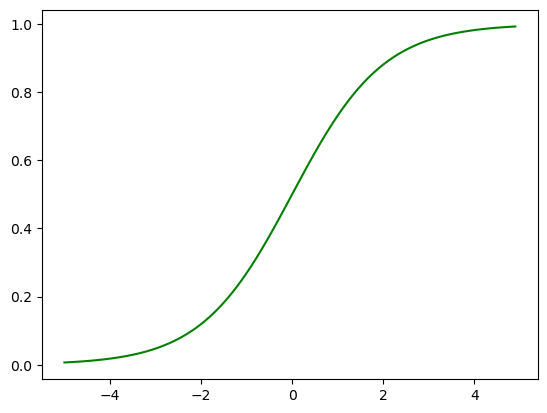

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)
plt.plot(x, y, 'g', label='Sigmoid Function')

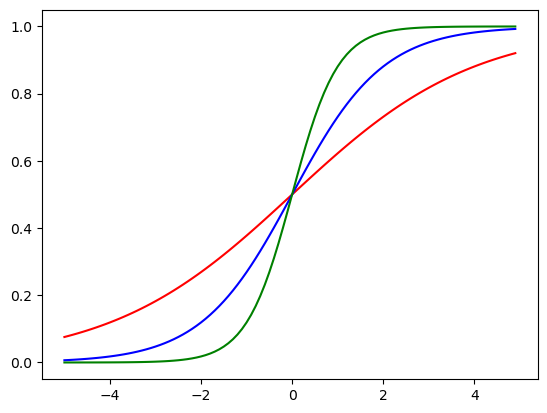

In [5]:
y1 = sigmoid(0.5 * x)
y2 = sigmoid(x)
y3 = sigmoid(2 * x)

plt.plot(x, y1, 'r', label='Sigmoid(0.5x)')
plt.plot(x, y2, 'b', label='Sigmoid(x)')
plt.plot(x, y3, 'g', label='Sigmoid(2x)')


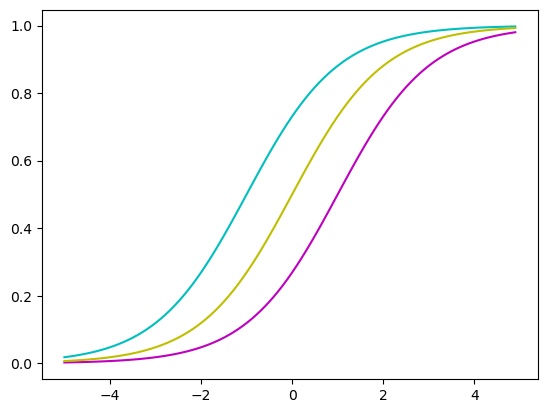

In [6]:
y1 = sigmoid(x + 1)
y2 = sigmoid(x - 1)
y3 = sigmoid(x)
plt.plot(x, y1, 'c', label='Sigmoid(x + 1)')
plt.plot(x, y2, 'm', label='Sigmoid(x - 1)')
plt.plot(x, y3, 'y', label='Sigmoid(x)')


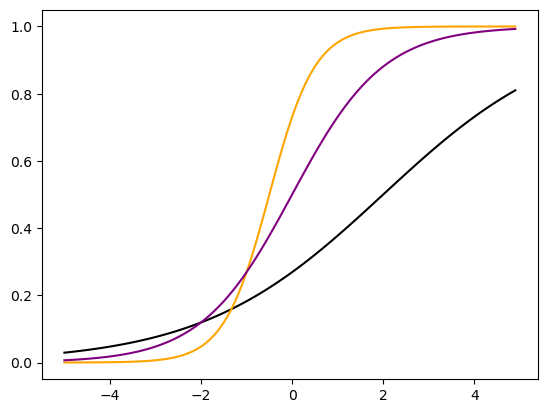

In [8]:
y1 = sigmoid(0.5*x - 1)
y2 = sigmoid(2*x + 1)
y3 = sigmoid(x)
plt.plot(x, y1, 'k', label='Sigmoid(0.5x + 1)')
plt.plot(x, y2, 'orange', label='Sigmoid(2x - 1)')
plt.plot(x, y3, 'purple', label='Sigmoid(x)')

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


In [11]:
torch.manual_seed(0)

In [12]:
x_data = torch.FloatTensor([[1,2], [2,3], [3,1], [4, 3], [5, 3], [6, 2]])
y_data = torch.FloatTensor([[0], [0], [0], [1], [1], [1]])
print(x_data)
print(y_data)
print(x_data.shape)
print(y_data.shape)

tensor([[1., 2.],
        [2., 3.],
        [3., 1.],
        [4., 3.],
        [5., 3.],
        [6., 2.]])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])
torch.Size([6, 2])
torch.Size([6, 1])


In [31]:
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
optimizer = optim.SGD([W, b], lr=0.1)

In [32]:
epochs = 100000
costs = []
for epoch in range(epochs):
    h = torch.sigmoid(x_data.matmul(W) + b)
    
    # cost = F.binary_cross_entropy(h, y_data)
    cost = -(y_data * torch.log(h) + (1 - y_data ) * torch.log(1 - h)).mean()

    costs.append([epoch, cost.item()])
    
    optimizer.zero_grad() # Reset gradients
    cost.backward() 
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Cost: {cost.item()}, W: {W.data.numpy().flatten()}, b: {b.data.numpy().flatten()}')


Epoch 0, Cost: 0.6931471824645996, W: [0.07500001 0.01666667], b: [0.]
Epoch 100, Cost: 0.41432666778564453, W: [ 0.7808538  -0.51846385], b: [-1.0379705]
Epoch 200, Cost: 0.34952056407928467, W: [ 0.9426186  -0.44405878], b: [-1.8183646]
Epoch 300, Cost: 0.3013016879558563, W: [ 1.0326204  -0.30449793], b: [-2.4913957]
Epoch 400, Cost: 0.26353225111961365, W: [ 1.1072106  -0.17184402], b: [-3.0858922]
Epoch 500, Cost: 0.23351818323135376, W: [ 1.176941   -0.05675968], b: [-3.6161942]
Epoch 600, Cost: 0.20931296050548553, W: [1.2436017  0.04184872], b: [-4.0929437]
Epoch 700, Cost: 0.1894957274198532, W: [1.3073441  0.12691239], b: [-4.524723]
Epoch 800, Cost: 0.17303510010242462, W: [1.3681374  0.20112535], b: [-4.9185157]
Epoch 900, Cost: 0.15917940437793732, W: [1.4260174  0.26662526], b: [-5.2799907]
Epoch 1000, Cost: 0.14737461507320404, W: [1.4810959 0.3250547], b: [-5.6137633]
Epoch 1100, Cost: 0.1372075080871582, W: [1.5335274 0.3776726], b: [-5.9236007]
Epoch 1200, Cost: 0.128

In [33]:
def predict(x):
    h = torch.sigmoid(x.matmul(W) + b)
    result = []
    for i in range(len(h)):
        if h[i] >= 0.5:
            result.append(1)
        else:
            result.append(0)
    return h, result

In [34]:
h, result = predict(x_data)
print("Predicted probabilities:", h.flatten().data.numpy())
print("Predicted classes:", result)

Predicted probabilities: [1.0730907e-06 3.5637380e-03 4.1710227e-03 9.9497050e-01 9.9997854e-01
 9.9999869e-01]
Predicted classes: [0, 0, 0, 1, 1, 1]
